In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import sys 
sys.path.append("../lib/")
from preprocessing import features, data_splitting, data_resampler

import xgboost as xgb

In [2]:
file = 'train_preprocessed_type_of_loan.csv'

df = pd.read_csv("../Data/" + file, low_memory=False)

Because of the high dimensionality of the data, it used a different preprocessing 

In [3]:
m, s, a, n = (0, 0, 1, 0)
tmp, num, cat = features(df, n, a)
X_train, X_test, y_train, y_test = data_splitting(tmp, cat, num, m)
X_train, y_train = data_resampler(X_train, y_train, s)

cat_preprocessor = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                            ("onehot", OneHotEncoder(sparse=True, handle_unknown="ignore"))])

num_preprocessor = Pipeline([
                            ("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer([
    ("numerical", num_preprocessor, num),
    ("categorical", cat_preprocessor, cat)
])

## Transforming
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

scaler = MaxAbsScaler()
try:
    X_train = scaler.fit_transform(X_train).toarray()
    X_test = scaler.transform(X_test).toarray()
except:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# **Introduction to Support Vector Machines**

**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying a kernel function to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using a **kernel**. It enable us to implicitly map the inputs into high dimensional feature spaces.

## Support Vector Machines intuition

### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.


### Margin in SVM

<p align='center'>
<img src='https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png'>
</p>

### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


### Maximum margin hyperplane
<p align='center'><img src='https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg'></p>

### Problem with dispersed datasets

Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


### Kernel trick - transformation of input space to higher dimensional space
<p align='center'><img src='http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png'></p>



## **Kernel Method**

In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows
$$K(\bar{x})= \left\{\begin{matrix}
1 & if \left\| \bar{x}\right\|\leq 1 \\
0 &  otherwise\\
\end{matrix}\right.$$

In the context of SVMs, there are 4 popular kernels: `Linear kernel`, `Polynomial kernel`, `Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`.

### **Linear kernel**

In linear kernel, the kernel function takes the form of a linear function as follows-

**linear kernel : K($x_i$ , $x_j$) = $x_i^T$ $x_j$**

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure
<p align="center">
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png'>
</p>

### **Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : $K(x_i , x_j) = (\gamma x_i^T x_j + r)^d , \gamma > 0$**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

<p align='center'><img src='https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png'></p>

### **Radial Basis Function Kernel**

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation 
$$K(x, y) = \exp\left ( -\frac{\left\|x-y \right\|^2}{2\sigma^2} \right ) $$

### **Sigmoid kernel**

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation $$K(x, y) = \tanh \left ( \alpha x^Ty + c \right )$$

In [4]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

SVC()

In [5]:
print(classification_report(model.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     42273
           1       0.60      0.75      0.67     34394
           2       0.86      0.72      0.78     51022

    accuracy                           0.75    127689
   macro avg       0.75      0.75      0.75    127689
weighted avg       0.77      0.75      0.75    127689



In [6]:
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      6637
           1       0.59      0.86      0.70      7345
           2       0.84      0.50      0.63      6018

    accuracy                           0.69     20000
   macro avg       0.73      0.68      0.68     20000
weighted avg       0.73      0.69      0.68     20000



It is prohibitive to use SVM for this particular dataset, because the SVM training time is $O(n^3)$, as shown in the figure below:

<center>
<img src="../images/SVC_time.png" style="width:331px;height:209px;">

# XGBoost

## Decision Tree algorithm terminology <a class="anchor" id="3"></a>

Before we dive into how a decision tree worksExternal link:open_in_new, let’s define some key terms of a decision tree.
- Root node: The base of the decision tree.
- Splitting: The process of dividing a node into multiple sub-nodes.
- Decision node: When a sub-node is further split into additional sub-nodes.
- Leaf node: When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
- Pruning: The process of removing sub-nodes of a decision tree.
- Branch: A subsection of the decision tree consisting of multiple nodes.

Let’s take a look at an example for this. You’re a golfer, and a consistent one at that. On any given day you want to predict where your score will be in two buckets: below par or over par.

<p align='center'><img src='https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg'></p>

While you are a consistent golfer, your score is dependent on a few sets of input variables. Wind speed, cloud cover and temperature all play a role. In addition, your score tends to deviate depending on whether or not you walk or ride a cart. And it deviates if you are golfing with friends or strangers.

A method to reduce the overfitting is training several decision trees independently, it isn't supposed to learn all the trees at once. But it is highly used the addition strategy: fix what we have learned, and add one new tree at a time.
So the prediction will be: 
$$\begin{split}\hat{y}_i^{(0)} &= 0\\
\hat{y}_i^{(1)} &= f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)\\
\hat{y}_i^{(2)} &= f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)\\
&\dots\\
\hat{y}_i^{(t)} &= \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)\end{split}$$

And the tree used for the next step, is the one who optimizes the following objective function: 
$$\sum_{i=1}^n [g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)] + \omega(f_t)$$

Where $g_i$, $h_i$, and the regularization term $\omega(f)$ are defined as: 
$$\begin{split}g_i &= \partial_{\hat{y}_i^{(t-1)}} l(y_i, \hat{y}_i^{(t-1)})\\
h_i &= \partial_{\hat{y}_i^{(t-1)}}^2 l(y_i, \hat{y}_i^{(t-1)})\\
\omega(f) &= \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2\end{split}$$

Where $w$ is the vector scores on the leaves and T is the number of leaves.
This becomes our optimization goal for the new tree. The important advantages of this definition is that the value of the objective function only depends on $g_i$ and $h_i$, and we can choose any loss function we want.

In general, the best objective reduction we can obtain is given by
$$
\begin{split} w_j^\ast &= -\frac{G_j}{H_j+\lambda}\\
\text{obj}^\ast &= -\frac{1}{2} \sum_{j=1}^T \frac{G_j^2}{H_j+\lambda} + \gamma T \quad(1)\end{split}
$$
Where $G_j = \sum_{i\in I_j} g_i$ and $H_j = \sum_{i\in I_j} h_i$ ($I_j = \{i|q(x_i)=j\}$ is the set of indices of data points assigned to the $j$-th leaf).

## Building the Trees
The equation 1 measures how good a tree is, and we would like to do this for all the trees we have. Realistically it is intractable, so the optimization are made every level at a time. Every node is splitted using the following formula: 
$$
Gain = \frac{1}{2} \left[\frac{G_L^2}{H_L+\lambda}+\frac{G_R^2}{H_R+\lambda}-\frac{(G_L+G_R)^2}{H_L+H_R+\lambda}\right] - \gamma
$$

The first addend represents the score on the new left leaf, the second represents the score on the new right leaf, the third represents the original leaf score, and the last is regularization on the additional leaf. 

Analysing the previous formula, it shows that if the gain is smaller than $\gamma$, it is better not to add that branch. (**Pruning Method**)

### Model Results

In [ ]:
model = xgb.XGBClassifier(tree_method='gpu_hist')
            
model.fit(X=X_train, y=y_train, eval_set=[(X_train, y_train), (X_val,y_val)], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

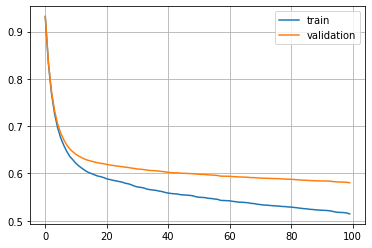

In [ ]:
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='validation')
# show the legend
plt.legend()
plt.grid()

In [ ]:
y_hat = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

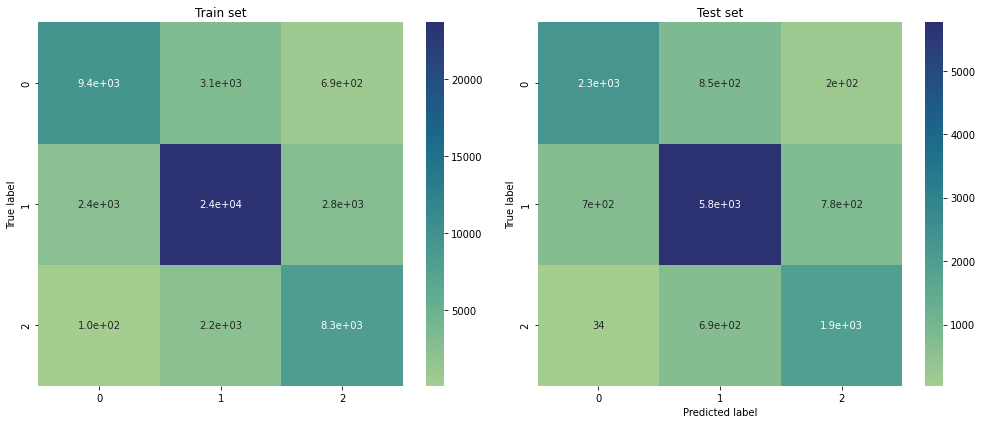

In [ ]:
cm = confusion_matrix(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val]))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm,ax=axs[0], cmap="crest", annot=True)
axs[0].set_title('Train set')
axs[0].set_ylabel('True label')

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,ax=axs[1], cmap="crest", annot=True)
axs[1].set_title('Test set')
axs[1].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
fig.tight_layout()

In [ ]:
print("Report Train Set:\n")
print(classification_report(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val])))
print("Report Test Set:\n")
print(classification_report(y_pred_test, y_test))

Report Train Set:

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     13248
           1       0.82      0.82      0.82     28879
           2       0.71      0.78      0.74     10628

    accuracy                           0.79     52755
   macro avg       0.77      0.77      0.77     52755
weighted avg       0.79      0.79      0.79     52755

Report Test Set:

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      2983
           1       0.80      0.79      0.79      7302
           2       0.73      0.66      0.69      2904

    accuracy                           0.75     13189
   macro avg       0.74      0.74      0.73     13189
weighted avg       0.76      0.75      0.75     13189



### Parameter Tuning

In [ ]:
param_tuning = {
        'learning_rate': [0.1, 0.06,0.01,0.006,0.001],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [200],
        'objective': ['multi:softmax'], 
        'reg_alpha'   : [0.5,0.2,1],
        'reg_lambda'  : [2,3,5]
    }

xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')

rsearch = RandomizedSearchCV(estimator = xgb_model,
                             param_distributions = param_tuning,
                             cv = 2,
                             n_jobs = 1,
                             verbose = 0)

rsearch.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-mlogloss:1.09342	validation_1-mlogloss:1.09346
[1]	validation_0-mlogloss:1.08782	validation_1-mlogloss:1.08787
[2]	validation_0-mlogloss:1.08298	validation_1-mlogloss:1.08300
[3]	validation_0-mlogloss:1.07738	validation_1-mlogloss:1.07738
[4]	validation_0-mlogloss:1.07244	validation_1-mlogloss:1.07244
[5]	validation_0-mlogloss:1.06755	validation_1-mlogloss:1.06756
[6]	validation_0-mlogloss:1.06245	validation_1-mlogloss:1.06243
[7]	validation_0-mlogloss:1.05734	validation_1-mlogloss:1.05731
[8]	validation_0-mlogloss:1.05239	validation_1-mlogloss:1.05234
[9]	validation_0-mlogloss:1.04787	validation_1-mlogloss:1.04783
[10]	validation_0-mlogloss:1.04286	validation_1-mlogloss:1.04280
[11]	validation_0-mlogloss:1.03818	validation_1-mlogloss:1.03811
[12]	validation_0-mlogloss:1.03376	validation_1-mlogloss:1.03369
[13]	validation_0-mlogloss:1.02921	validation_1-mlogloss:1.02916
[14]	validation_0-mlogloss:1.02460	validation_1-mlogloss:1.02454
[15]	validation_0-mlogloss:1.02017	

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           num_parallel_tree=None,
                                           predictor=None, random_state

In [ ]:
print('Best Score: %s' % rsearch.best_score_)
print('Best Hyperparameters: %s' % rsearch.best_params_)

Best Score: 0.7711418895010869
Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 5, 'reg_alpha': 0.5, 'objective': 'multi:softmax', 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [ ]:
y_hat = rsearch.predict(X_train)
y_pred_val = rsearch.predict(X_val)
y_pred_test = rsearch.predict(X_test)

In [ ]:
print("Report Train Set:\n")
print(classification_report(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val])))
print("Report Test Set:\n")
print(classification_report(y_pred_test, y_test))

Report Train Set:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     13253
           1       0.92      0.92      0.92     28855
           2       0.91      0.90      0.90     10647

    accuracy                           0.92     52755
   macro avg       0.91      0.91      0.91     52755
weighted avg       0.92      0.92      0.92     52755

Report Test Set:

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      3181
           1       0.83      0.82      0.83      7359
           2       0.76      0.75      0.75      2649

    accuracy                           0.80     13189
   macro avg       0.79      0.79      0.79     13189
weighted avg       0.80      0.80      0.80     13189



In [ ]:
params = {'subsample': 0.7,
 'reg_lambda': 3,
 'reg_alpha': 1,
 'objective': 'multi:softmax',
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.006,
 'colsample_bytree': 0.7}

#params = results_RS['params'][5] #7, 3

model = xgb.XGBClassifier(tree_method='gpu_hist', **params)
model.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.006, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=1, ...)

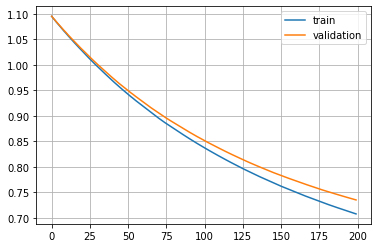

In [ ]:
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='validation')
# show the legend
plt.legend()
plt.grid()

In [ ]:
y_hat = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

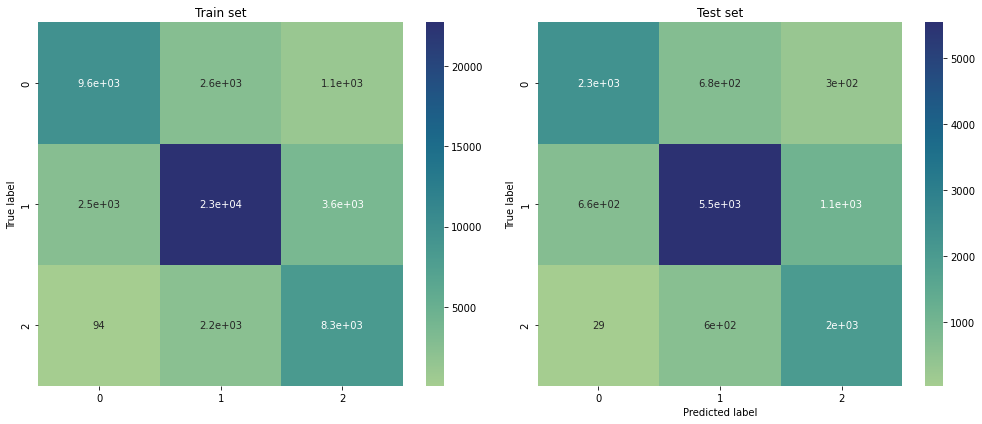

In [ ]:
cm = confusion_matrix(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val]))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm,ax=axs[0], cmap="crest", annot=True)
axs[0].set_title('Train set')
axs[0].set_ylabel('True label')

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,ax=axs[1], cmap="crest", annot=True)
axs[1].set_title('Test set')
axs[1].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
fig.tight_layout()

In [ ]:
print("Report Train Set:\n")
print(classification_report(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val])))
print("Report Test Set:\n")
print(classification_report(y_pred_test, y_test))

Report Train Set:

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     13253
           1       0.83      0.79      0.81     28855
           2       0.64      0.78      0.70     10647

    accuracy                           0.77     52755
   macro avg       0.75      0.76      0.75     52755
weighted avg       0.78      0.77      0.77     52755

Report Test Set:

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      3000
           1       0.76      0.81      0.79      6822
           2       0.76      0.59      0.67      3367

    accuracy                           0.75     13189
   macro avg       0.74      0.73      0.73     13189
weighted avg       0.75      0.75      0.74     13189



In [ ]:
params = {'subsample': 0.7,
 'reg_lambda': 3,
 'reg_alpha': 1,
 'objective': 'multi:softmax',
 'n_estimators': 400,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.006,
 'colsample_bytree': 0.7}

#params = results_RS['params'][5] #7, 3

model = xgb.XGBClassifier(tree_method='gpu_hist', **params)
model.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.006, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=0, reg_alpha=1, ...)

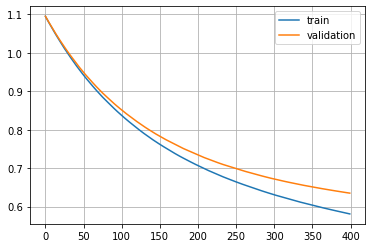

In [ ]:
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='validation')
# show the legend
plt.legend()
plt.grid()

In [ ]:
y_hat = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

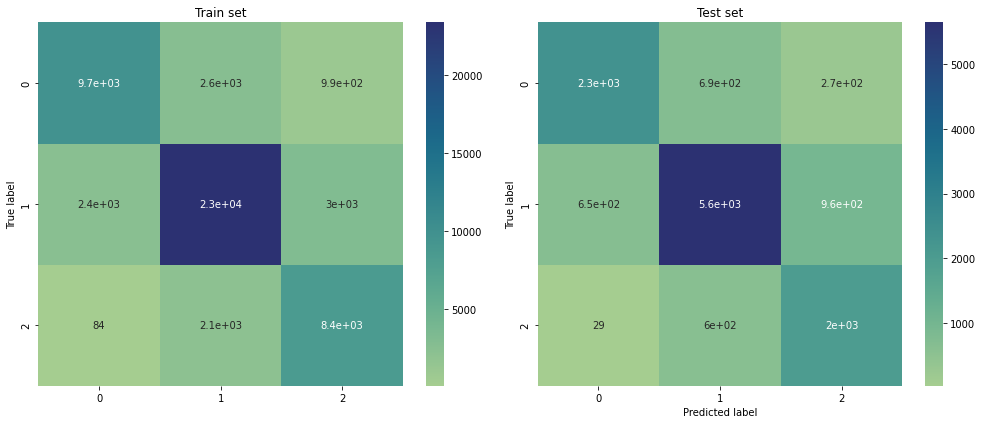

In [ ]:
cm = confusion_matrix(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val]))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm,ax=axs[0], cmap="crest", annot=True)
axs[0].set_title('Train set')
axs[0].set_ylabel('True label')

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm,ax=axs[1], cmap="crest", annot=True)
axs[1].set_title('Test set')
axs[1].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
fig.tight_layout()

In [ ]:
print("Report Train Set:\n")
print(classification_report(np.concatenate([y_train, y_val]), np.concatenate([y_hat, y_pred_val])))
print("Report Test Set:\n")
print(classification_report(y_pred_test, y_test))

Report Train Set:

              precision    recall  f1-score   support

           0       0.79      0.73      0.76     13253
           1       0.83      0.81      0.82     28855
           2       0.68      0.79      0.73     10647

    accuracy                           0.79     52755
   macro avg       0.77      0.78      0.77     52755
weighted avg       0.79      0.79      0.79     52755

Report Test Set:

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3020
           1       0.78      0.81      0.80      6942
           2       0.76      0.62      0.68      3227

    accuracy                           0.76     13189
   macro avg       0.75      0.74      0.74     13189
weighted avg       0.76      0.76      0.76     13189



# Conclusions
The models used to perform the predictions reaches good performances after tuning the parameters. The models which show the best results are the Neural Network, and the XGBoost. On the other hand, due to the computational time we were not able to perform a tuning parameters on the SVM but it still has decent results. 
Using this tecnologies in this particular field is risky because every customer has its own financial history/situation. 

**Here are the results of our four models**: 

<table> 
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
    </tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2 + dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
    <tr>
        <td>
        SVM
        </td>
        <td>
        75%
        </td>
        <td>
        69%
        </td>
    </tr>
    <tr>
        <td>
        XGBoost
        </td>
        <td>
        79%
        </td>
        <td>
        76%
        </td>
    </tr>         
</table> 